In [3]:
# Massimiliano Viola 12213195 and David Mihola 12211951

import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

BATCH_SIZE = 32
EPOCHS = 20

# to have consistent results
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [4]:
sc_zip_df = pd.read_csv("./data/social_capital_zip.csv")
print(f"Number of rows: {sc_zip_df.shape[0]}.")
print(f"Number of rows where all variables are not NaN: {sc_zip_df.dropna().shape[0]}.")

corr_with_sc_zip = sc_zip_df.corr()["ec_zip"]
# get the 10 most correlated variables with 'ec_zip', 'abs()' to ensure negative correlaction is included
best_corr = corr_with_sc_zip.abs().nlargest(11).index
best_corr = list(best_corr)
print("Selected variables: ", best_corr[1:])
data_df = sc_zip_df[best_corr]
print(f"Number of rows where chosen variables are not NaN: {data_df.dropna().shape[0]}.")

data_df = data_df.dropna(subset=["ec_zip"])
print(f"Number of rows where 'ec_zip' is not NaN: {data_df.shape[0]}.")


Number of rows: 23028.
Number of rows where all variables are not NaN: 14269.
Selected variables:  ['ec_grp_mem_zip', 'exposure_grp_mem_zip', 'nbhd_ec_zip', 'ec_high_zip', 'nbhd_exposure_zip', 'ec_grp_mem_high_zip', 'exposure_grp_mem_high_zip', 'nbhd_ec_high_zip', 'nbhd_bias_high_zip', 'bias_grp_mem_zip']
Number of rows where chosen variables are not NaN: 14285.
Number of rows where 'ec_zip' is not NaN: 18980.


In [5]:
data_df = data_df.fillna(data_df.mean())
data_df

,ec_zip,ec_grp_mem_zip,exposure_grp_mem_zip,nbhd_ec_zip,ec_high_zip,nbhd_exposure_zip,ec_grp_mem_high_zip,exposure_grp_mem_high_zip,nbhd_ec_high_zip,nbhd_bias_high_zip,bias_grp_mem_zip
0,0.88157,1.10210,1.12959,1.510950,1.47136,1.505900,1.60238,1.45669,1.824940,-0.211860,0.02434
1,1.18348,1.23333,1.36818,0.977600,1.62290,1.202820,1.63119,1.53277,1.495740,-0.243530,0.09856
2,1.37536,1.44359,1.48032,0.839978,1.65159,0.928775,1.65871,1.57757,1.184993,-0.328637,0.02482
3,1.15543,1.30756,1.31876,1.464910,1.47733,1.463970,1.54186,1.43769,1.630820,-0.113970,0.00850
4,1.19240,1.32294,1.30741,1.179850,1.56812,1.231090,1.59415,1.43019,1.493100,-0.212830,-0.01188
...,...,...,...,...,...,...,...,...,...,...,...
23022,1.11489,1.22142,1.12647,0.839978,1.43376,0.928775,1.43537,1.24314,1.184993,-0.328637,-0.08429
23023,0.99517,0.95456,1.01237,0.880140,1.29659,0.947620,1.24623,1.09039,1.155630,-0.219500,0.05710
23024,0.87977,0.82996,0.88303,0.745550,1.18270,0.816800,1.13455,1.04318,0.933920,-0.143390,0.06010
23026,0.87888,0.83409,0.84147,0.810810,1.07167,0.806940,0.99697,0.92952,0.884850,-0.096550,0.00877


In [6]:
description = data_df.describe()
print(f"min: {description.loc['min'].min()}, max: {description.loc['max'].max()}")
description

min: -1.81034, max: 1.9527


,ec_zip,ec_grp_mem_zip,exposure_grp_mem_zip,nbhd_ec_zip,ec_high_zip,nbhd_exposure_zip,ec_grp_mem_high_zip,exposure_grp_mem_high_zip,nbhd_ec_high_zip,nbhd_bias_high_zip,bias_grp_mem_zip
count,18980.000000,18980.000000,18980.000000,18980.000000,18980.000000,18980.000000,18980.000000,18980.000000,18980.000000,18980.000000,18980.000000
mean,0.882883,0.954574,1.005052,0.839978,1.317087,0.928775,1.357356,1.183422,1.184993,-0.328637,0.057153
std,0.218532,0.257143,0.234525,0.313276,0.207770,0.306827,0.221164,0.230115,0.303118,0.169759,0.070845
min,0.234780,0.142000,0.170860,0.022600,0.474010,0.081950,0.421010,0.364370,0.065000,-1.810340,-0.143050
25%,0.730197,0.775330,0.846545,0.649728,1.173542,0.745080,1.211335,1.027480,1.029688,-0.373812,0.008060
50%,0.876350,0.954574,1.005052,0.839978,1.318000,0.928775,1.357356,1.183422,1.184993,-0.328637,0.051350
75%,1.033513,1.128650,1.166183,0.971403,1.468303,1.070375,1.515737,1.344542,1.342448,-0.224413,0.095375
max,1.707910,1.819970,1.749660,1.938750,1.832050,1.912000,1.894490,1.770280,1.952700,0.332360,0.520490


In [7]:
data_train_df, data_test_df = train_test_split(data_df, test_size=0.2, random_state=42)
print(f"Number of training samples: {data_train_df.shape[0]}, number of testing samples: {data_test_df.shape[0]}")

Number of training samples: 15184, number of testing samples: 3796


In [8]:
Y_train = data_train_df.pop("ec_zip")

train_mean = data_train_df.mean()
train_std = data_train_df.std()
X_train = (data_train_df - train_mean) / train_std # normalization to N(0, 1)
X_train

,ec_grp_mem_zip,exposure_grp_mem_zip,nbhd_ec_zip,ec_high_zip,nbhd_exposure_zip,ec_grp_mem_high_zip,exposure_grp_mem_high_zip,nbhd_ec_high_zip,nbhd_bias_high_zip,bias_grp_mem_zip
11042,-1.023551,-1.054143,-1.181795,-0.894389,-1.368564,-1.002531,-1.202954,-1.161657,-1.812374,0.431287
15665,-0.388016,-0.172045,-0.001765,-0.394620,-0.000959,-0.272065,-0.389082,0.000807,-0.002619,0.804790
20313,1.012139,0.869793,1.538059,0.826633,1.374173,0.915417,0.707174,1.341094,0.885409,-0.876187
14823,-0.741636,-0.790366,-0.594377,-1.542946,-0.869484,-1.114584,-0.805151,-0.884903,-0.330887,0.154245
11232,0.917934,0.664113,1.007424,0.775915,1.060281,0.737090,0.678927,1.033945,0.789522,-1.172379
...,...,...,...,...,...,...,...,...,...,...
13635,0.359242,0.636132,-0.028281,0.574344,0.171337,0.540613,0.583772,0.145304,0.449917,0.508882
14544,0.386258,0.228567,0.035842,0.055442,-0.291858,-0.061773,0.006638,-0.411906,0.385149,-0.745397
6550,-0.511767,-0.763451,-0.389592,-0.784734,-0.479131,-0.743707,-0.955499,-0.350456,-0.300533,-0.758873
1083,0.449477,0.668634,-0.001765,-0.014841,-0.000959,0.326529,0.251749,0.000807,-0.002619,0.310143


In [9]:
Y_test = data_test_df.pop("ec_zip")
X_test = (data_test_df - train_mean) / train_std # normalization using train statistics
X_test

,ec_grp_mem_zip,exposure_grp_mem_zip,nbhd_ec_zip,ec_high_zip,nbhd_exposure_zip,ec_grp_mem_high_zip,exposure_grp_mem_high_zip,nbhd_ec_high_zip,nbhd_bias_high_zip,bias_grp_mem_zip
18926,0.330046,0.211761,0.612376,-0.062674,0.278174,0.082062,-0.031025,0.564120,-0.047285,-0.603826
7974,0.422384,0.244732,1.235892,0.218891,0.913096,0.403458,0.223980,1.104084,0.423974,-0.818736
5701,-0.139189,-0.328886,0.269035,-0.760794,-0.099794,-0.659284,-0.680057,-0.085264,0.225023,-0.670498
22407,0.406656,0.260344,0.672605,0.214083,0.554129,0.306846,0.017702,0.692404,0.350441,-0.716459
16775,0.045913,0.278899,-0.260580,0.570787,0.207645,0.560341,0.639962,0.471251,-0.052050,0.568886
...,...,...,...,...,...,...,...,...,...,...
22613,0.617295,0.773351,-0.474047,0.559153,-0.294042,0.213168,0.820987,-0.567380,0.709283,0.065019
7431,-0.799911,-1.013066,-1.925929,0.115197,-1.947134,-0.354592,-0.347340,-2.409779,-0.263531,-0.468497
6223,-0.921832,-1.242761,-0.967306,-1.035821,-1.104113,-1.035262,-1.197704,-1.409901,0.259495,-0.890231
6537,-1.403330,-1.111897,-1.614346,0.296673,-0.690359,0.291089,0.048249,0.264404,-2.560058,2.054955


In [10]:
def plot_model_training(history, title="model loss"):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

def create_run_model(layer_depth, neurons):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(10,)))
    if type(neurons) == tuple:
        if len(neurons) != layer_depth:
            return (None, None)
        
        for neuron_count in neurons:
            model.add(tf.keras.layers.Dense(neuron_count, activation='relu'))  
            model.add(tf.keras.layers.Dropout(0.4))
        model.pop()
    else:
        for _ in range(layer_depth):
            model.add(tf.keras.layers.Dense(neurons, activation='relu'))  
            model.add(tf.keras.layers.Dropout(0.4))
        model.pop()
    
    model.add(tf.keras.layers.Dense(1))
    print(model.summary())

    model.compile(optimizer='adam', loss='mse')
    history = model.fit(X_train, Y_train, epochs=EPOCHS, validation_split=0.2, batch_size=BATCH_SIZE, verbose=0)

    plot_model_training(history)

    return history.history['loss'][-1], history.history['val_loss'][-1]

Epoch 1/20


2022-11-21 19:50:30.730202: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-21 19:50:30.730224: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (david): /proc/driver/nvidia/version does not exist
2022-11-21 19:50:30.731870: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old 

380/380 [==============================] - 1s 2ms/step - loss: 1.4334 - val_loss: 0.6571
Epoch 2/20
380/380 [==============================] - 1s 2ms/step - loss: 0.3518 - val_loss: 0.1441
Epoch 3/20
380/380 [==============================] - 0s 1ms/step - loss: 0.0743 - val_loss: 0.0316
Epoch 4/20
380/380 [==============================] - 0s 1ms/step - loss: 0.0184 - val_loss: 0.0108
Epoch 5/20
380/380 [==============================] - 0s 1ms/step - loss: 0.0085 - val_loss: 0.0071
Epoch 6/20
380/380 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0057
Epoch 7/20
380/380 [==============================] - 0s 1ms/step - loss: 0.0052 - val_loss: 0.0047
Epoch 8/20
380/380 [==============================] - 0s 922us/step - loss: 0.0042 - val_loss: 0.0040
Epoch 9/20
380/380 [==============================] - 0s 952us/step - loss: 0.0036 - val_loss: 0.0034
Epoch 10/20
380/380 [==============================] - 0s 960us/step - loss: 0.0031 - val_loss: 0.0030
Epoc

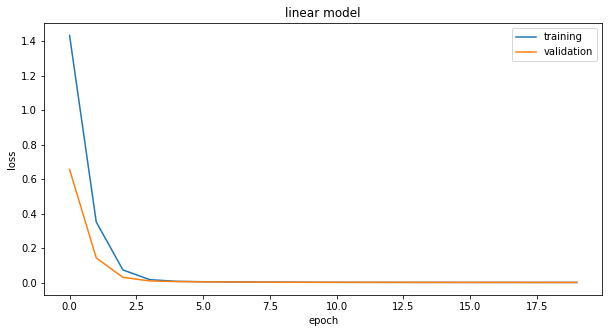

In [11]:
# linear model baseline
linear_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=10)
])
linear_model.compile(optimizer='adam', loss='mse')
linear_history = linear_model.fit(
    X_train, Y_train, 
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_split=0.2
)

plot_model_training(linear_history, "linear model")

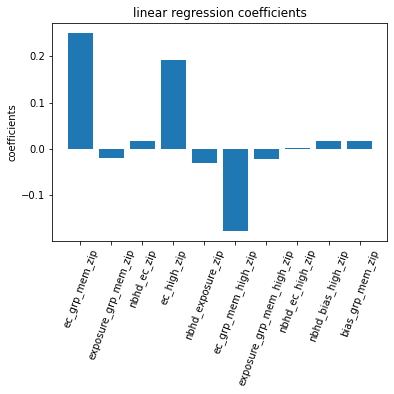

In [12]:
w, b = linear_model.weights[0].numpy(), linear_model.weights[1].numpy()

plt.bar(X_train.columns, w.flatten())
plt.xticks(rotation=70)
plt.title('linear regression coefficients')
plt.ylabel('coefficients')
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
None


/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


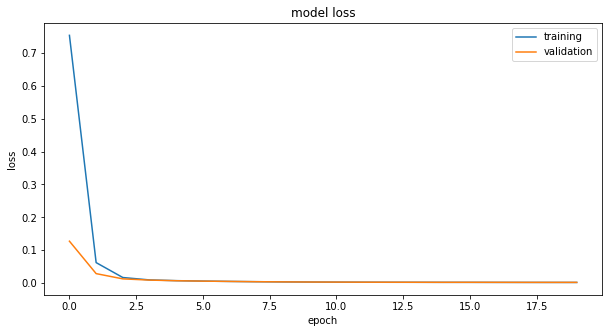

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                220       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
None


/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


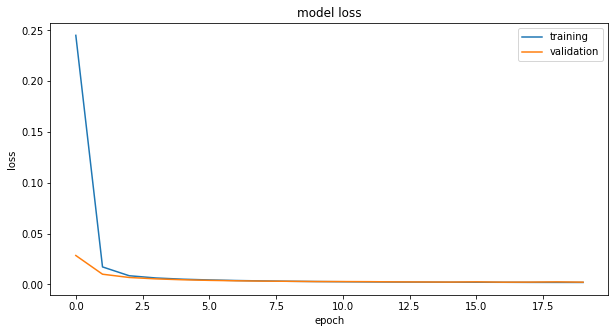

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 30)                330       
                                                                 
 dense_6 (Dense)             (None, 1)                 31        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________
None


/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


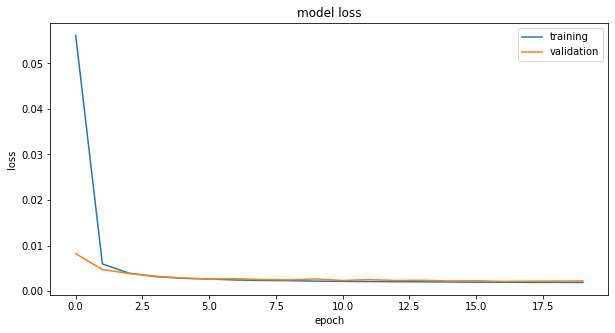

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________
None


/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


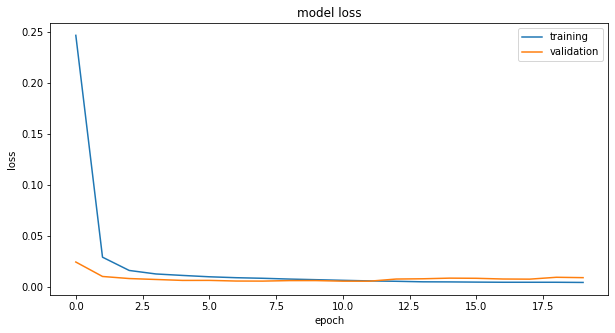

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20)                220       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_11 (Dense)            (None, 20)                420       
                                                                 
 dense_12 (Dense)            (None, 1)                 21        
                                                                 
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________
None


/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


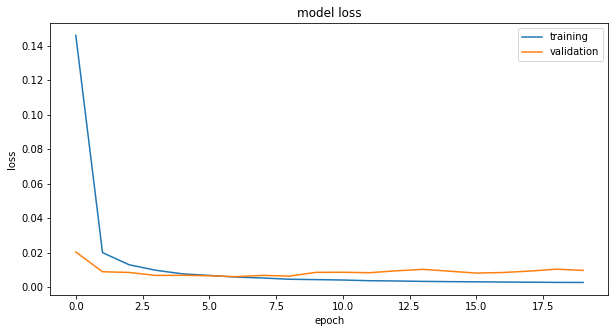

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 30)                330       
                                                                 
 dropout_7 (Dropout)         (None, 30)                0         
                                                                 
 dense_14 (Dense)            (None, 30)                930       
                                                                 
 dense_15 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,291
Trainable params: 1,291
Non-trainable params: 0
_________________________________________________________________
None


/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


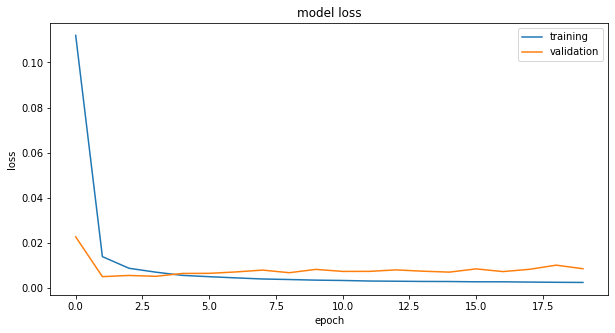

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 20)                220       
                                                                 
 dropout_9 (Dropout)         (None, 20)                0         
                                                                 
 dense_17 (Dense)            (None, 10)                210       
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________
None


/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


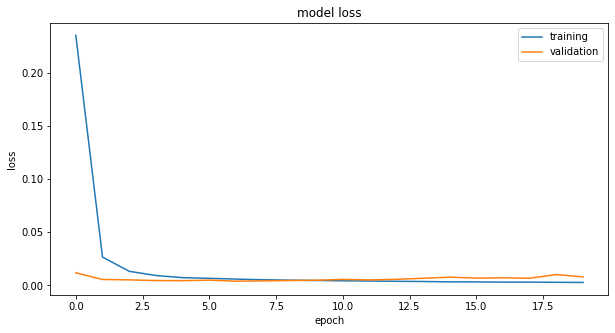

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 30)                330       
                                                                 
 dropout_11 (Dropout)        (None, 30)                0         
                                                                 
 dense_20 (Dense)            (None, 20)                620       
                                                                 
 dense_21 (Dense)            (None, 1)                 21        
                                                                 
Total params: 971
Trainable params: 971
Non-trainable params: 0
_________________________________________________________________
None


/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


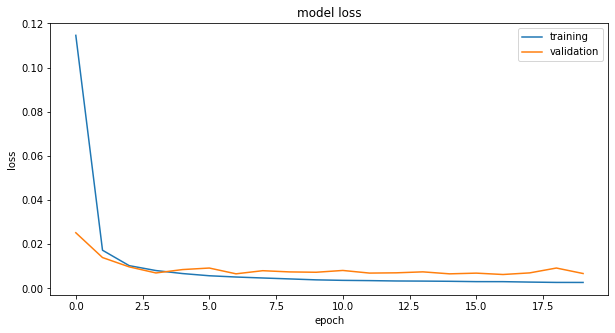

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dropout_13 (Dropout)        (None, 10)                0         
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
 dropout_14 (Dropout)        (None, 10)                0         
                                                                 
 dense_24 (Dense)            (None, 10)                110       
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 341
Trainable params: 341
Non-trainable

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


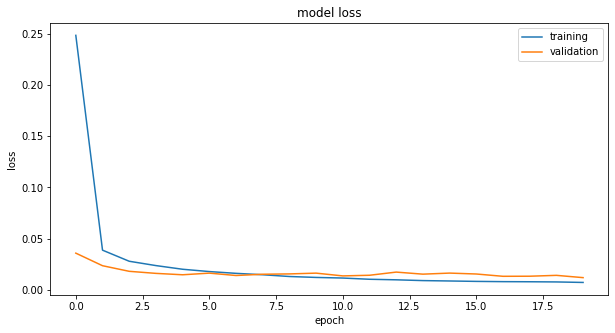

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 20)                220       
                                                                 
 dropout_16 (Dropout)        (None, 20)                0         
                                                                 
 dense_27 (Dense)            (None, 20)                420       
                                                                 
 dropout_17 (Dropout)        (None, 20)                0         
                                                                 
 dense_28 (Dense)            (None, 20)                420       
                                                                 
 dense_29 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,081
Trainable params: 1,081
Non-train

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


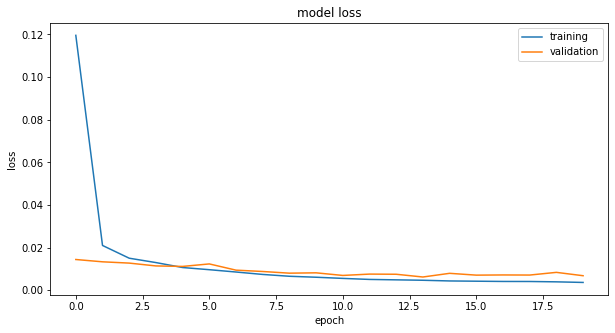

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 30)                330       
                                                                 
 dropout_19 (Dropout)        (None, 30)                0         
                                                                 
 dense_31 (Dense)            (None, 30)                930       
                                                                 
 dropout_20 (Dropout)        (None, 30)                0         
                                                                 
 dense_32 (Dense)            (None, 30)                930       
                                                                 
 dense_33 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-train

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


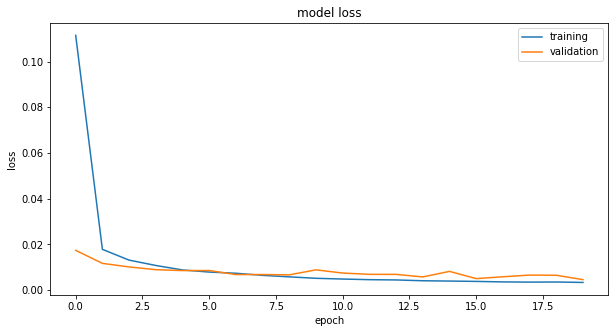

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 30)                330       
                                                                 
 dropout_22 (Dropout)        (None, 30)                0         
                                                                 
 dense_35 (Dense)            (None, 20)                620       
                                                                 
 dropout_23 (Dropout)        (None, 20)                0         
                                                                 
 dense_36 (Dense)            (None, 10)                210       
                                                                 
 dense_37 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,171
Trainable params: 1,171
Non-train

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


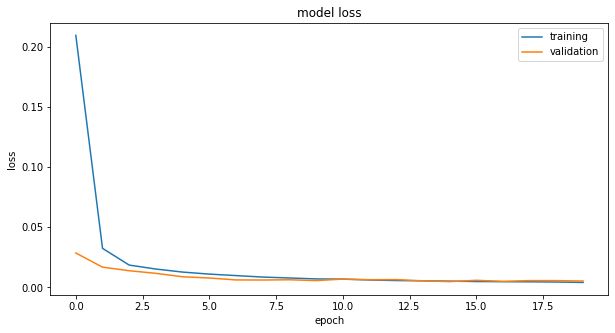

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 10)                110       
                                                                 
 dropout_25 (Dropout)        (None, 10)                0         
                                                                 
 dense_39 (Dense)            (None, 20)                220       
                                                                 
 dropout_26 (Dropout)        (None, 20)                0         
                                                                 
 dense_40 (Dense)            (None, 10)                210       
                                                                 
 dense_41 (Dense)            (None, 1)                 11        
                                                                 
Total params: 551
Trainable params: 551
Non-trainable

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


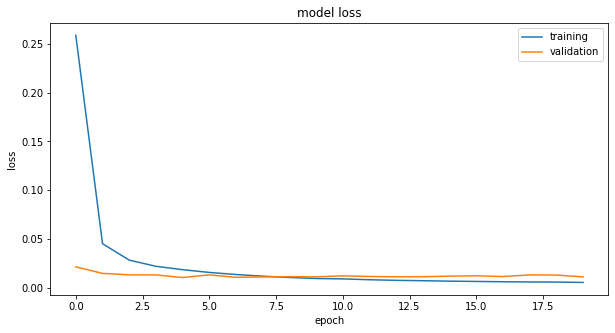

In [13]:
models_layers = [
    ("1 layer", 1),
    ("2 layers", 2),
    ("3 layers", 3)
]

models_neurons = [
    ("all 10", 10),
    ("all 20", 20),
    ("all 30", 30),
    ("20, 10", (20, 10)),
    ("30, 20", (30, 20)),
    ("30, 20, 10", (30, 20, 10)),
    ("10, 20, 10", (10, 20, 10)),
]

layers_results_loss_df = pd.DataFrame()
layers_results_validation_loss_df = pd.DataFrame()

for layer_name, depth in models_layers:
    for neuron_name, count in models_neurons:
        result = create_run_model(depth, count)
        layers_results_loss_df.loc[neuron_name, layer_name], layers_results_validation_loss_df.loc[neuron_name, layer_name] = result

In [14]:
layers_results_loss_df.style.background_gradient(cmap='Blues', axis=None)

,1 layer,2 layers,3 layers
all 10,0.001993,0.004046,0.007084
all 20,0.002020,0.002651,0.003661
all 30,0.001895,0.002416,0.003362
"20, 10",nan,0.002817,nan
"30, 20",nan,0.002678,nan
"30, 20, 10",nan,nan,0.004095
"10, 20, 10",nan,nan,0.005282


In [15]:
layers_results_validation_loss_df.style.background_gradient(cmap='Blues', axis=None)

,1 layer,2 layers,3 layers
all 10,0.002190,0.008752,0.011782
all 20,0.002313,0.009641,0.006817
all 30,0.002221,0.008503,0.004593
"20, 10",nan,0.008023,nan
"30, 20",nan,0.006723,nan
"30, 20, 10",nan,nan,0.005270
"10, 20, 10",nan,nan,0.010979


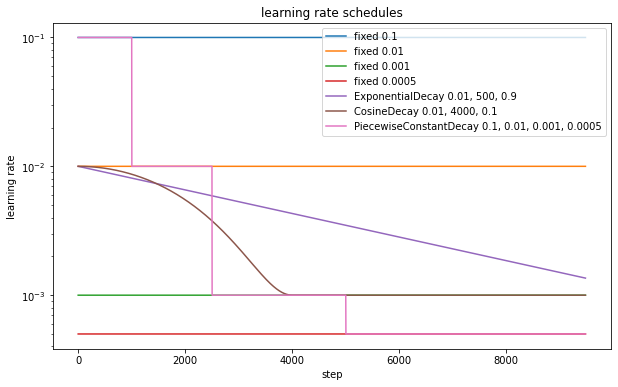

In [16]:
def plot_lr_schedules():
    plt.figure(figsize=(10,6))
    steps = np.arange(len(X_train)//BATCH_SIZE * EPOCHS)
    plt.plot(steps, [0.1]*len(steps), label="fixed 0.1")
    plt.plot(steps, [0.01]*len(steps), label="fixed 0.01")
    plt.plot(steps, [0.001]*len(steps), label="fixed 0.001")
    plt.plot(steps, [0.0005]*len(steps), label="fixed 0.0005")
    plt.plot(steps, tf.keras.optimizers.schedules.ExponentialDecay(0.01, 500, 0.9)(steps),
            label="ExponentialDecay 0.01, 500, 0.9")
    plt.plot(steps, tf.keras.optimizers.schedules.CosineDecay(0.01, 4000, 0.1)(steps),
            label="CosineDecay 0.01, 4000, 0.1")
    plt.plot(steps, [tf.keras.optimizers.schedules.PiecewiseConstantDecay([1000, 2500, 5000], [0.1, 0.01, 0.001, 0.0005])(step) for step in steps],
            label="PiecewiseConstantDecay 0.1, 0.01, 0.001, 0.0005")
    plt.ylabel("learning rate")
    plt.xlabel("step")
    plt.title("learning rate schedules")
    plt.yscale("log")
    plt.legend()

plot_lr_schedules()

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD, learning rate: fixed 0.1


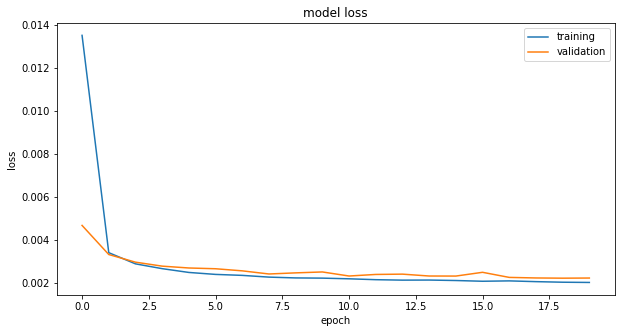

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD, learning rate: fixed 0.01


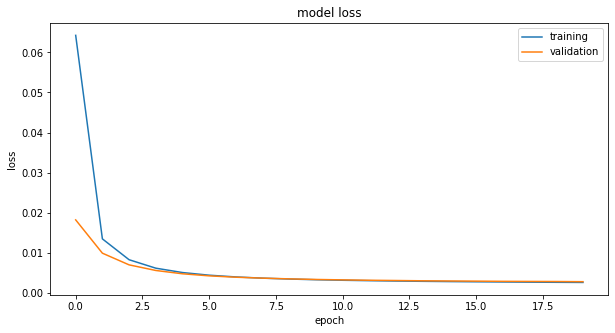

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD, learning rate: fixed 0.001


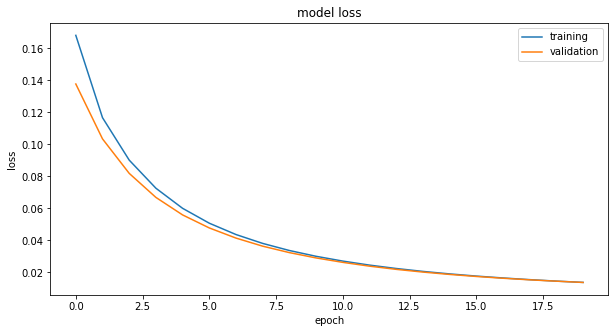

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD, learning rate: fixed 0.0005


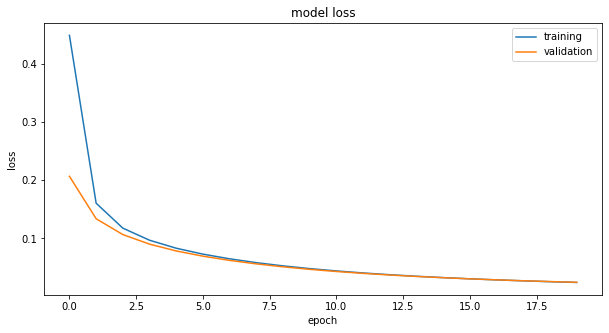

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD, learning rate: ExponentialDecay 0.01, 500, 0.9


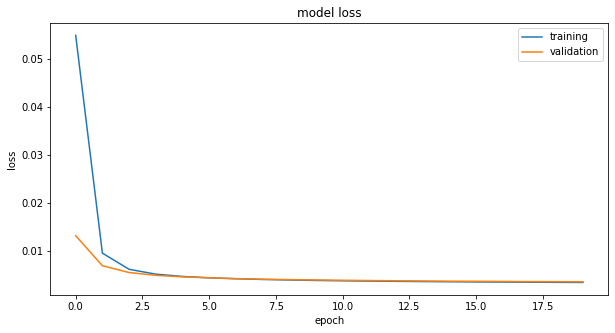

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD, learning rate: CosineDecay 0.01, 4000, 0.1


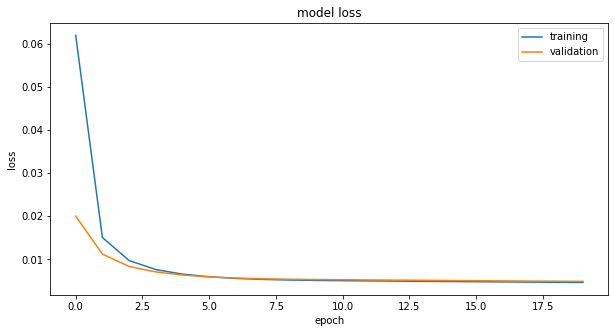

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD, learning rate: PiecewiseConstantDecay 0.1, 0.01, 0.001, 0.0005


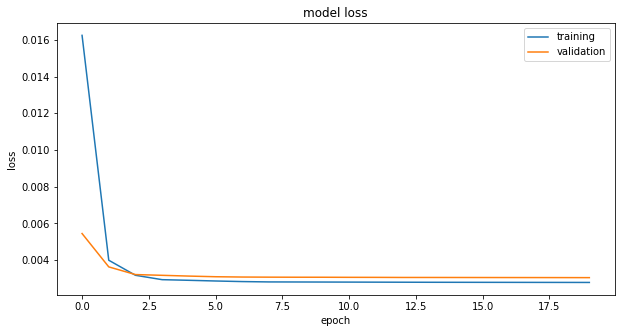

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD momentum 0.9, learning rate: fixed 0.1


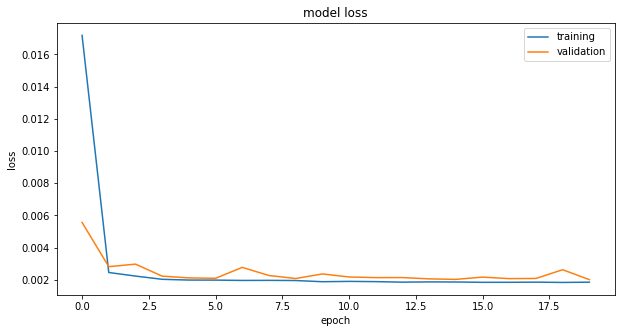

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD momentum 0.9, learning rate: fixed 0.01


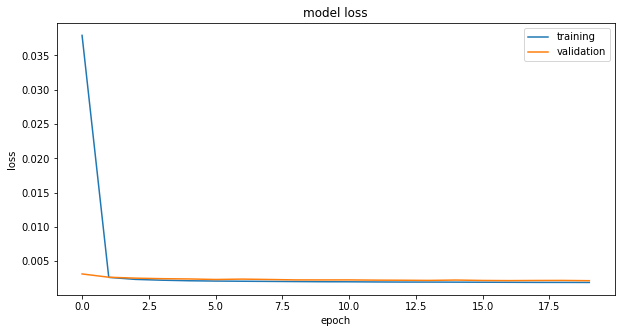

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD momentum 0.9, learning rate: fixed 0.001


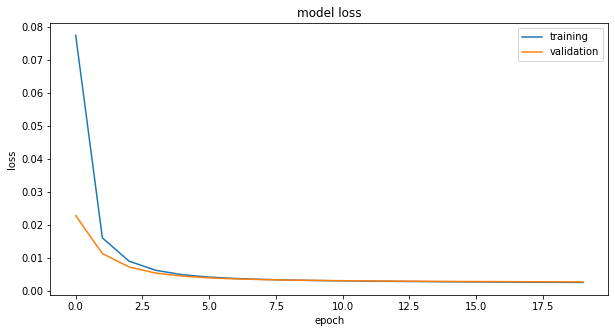

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD momentum 0.9, learning rate: fixed 0.0005


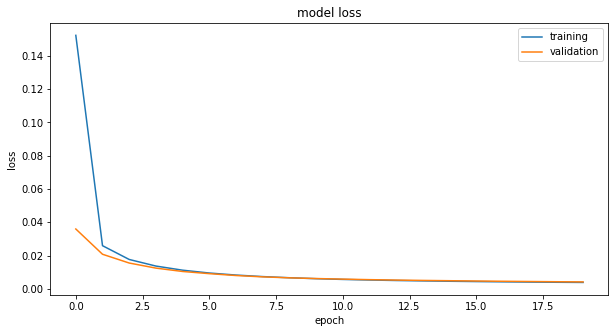

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD momentum 0.9, learning rate: ExponentialDecay 0.01, 500, 0.9


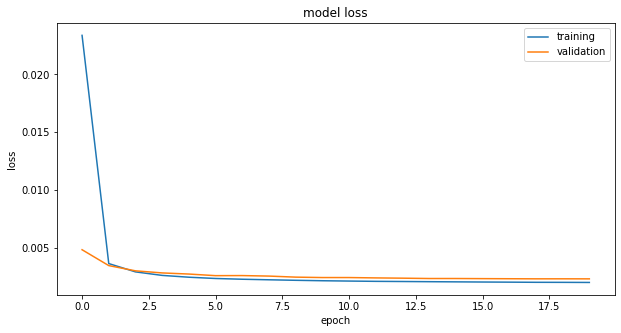

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD momentum 0.9, learning rate: CosineDecay 0.01, 4000, 0.1


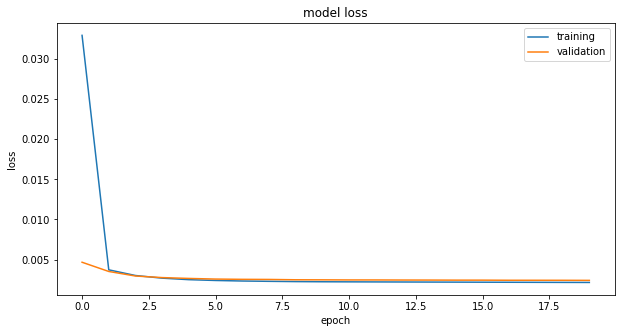

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD momentum 0.9, learning rate: PiecewiseConstantDecay 0.1, 0.01, 0.001, 0.0005


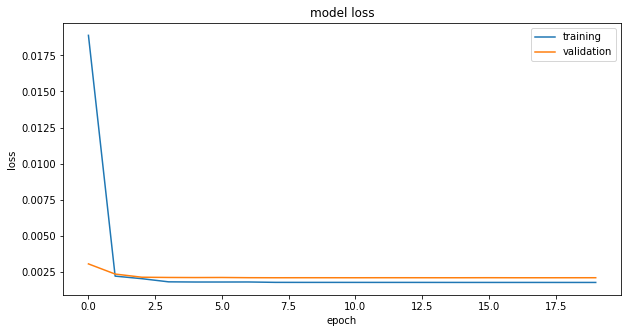

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD momentum 0.75, learning rate: fixed 0.1


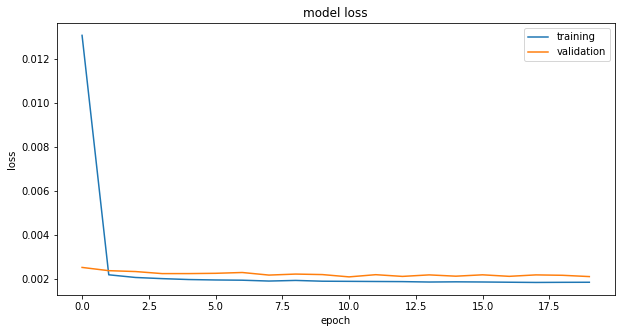

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD momentum 0.75, learning rate: fixed 0.01


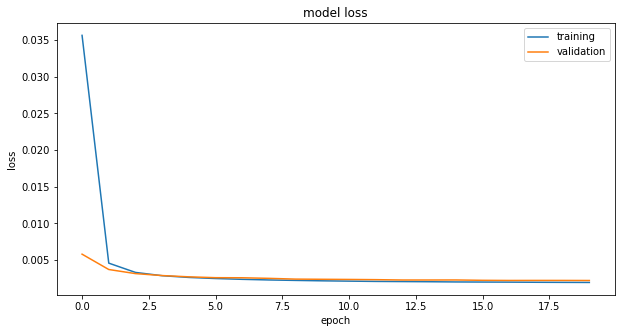

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD momentum 0.75, learning rate: fixed 0.001


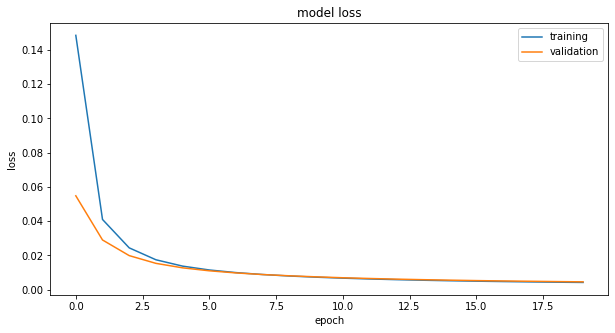

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD momentum 0.75, learning rate: fixed 0.0005


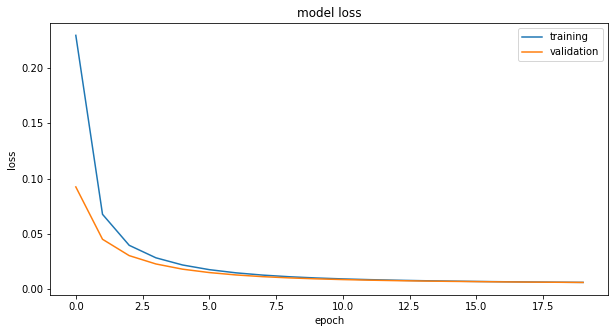

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD momentum 0.75, learning rate: ExponentialDecay 0.01, 500, 0.9


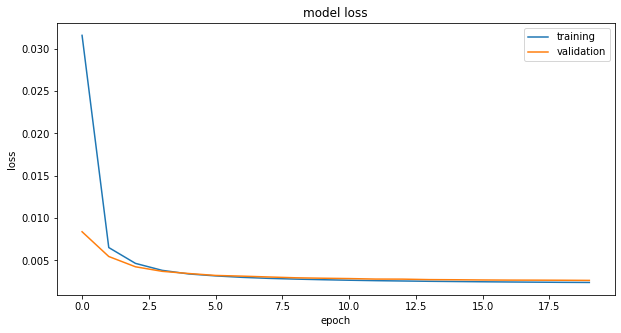

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD momentum 0.75, learning rate: CosineDecay 0.01, 4000, 0.1


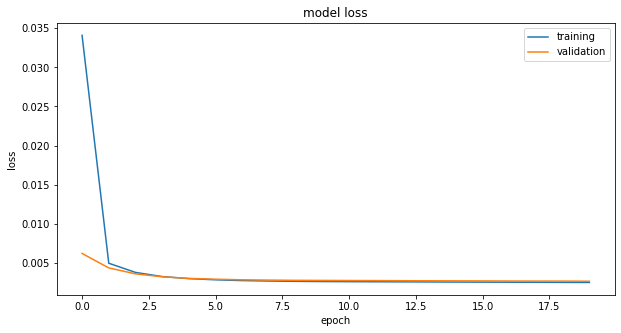

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: SGD momentum 0.75, learning rate: PiecewiseConstantDecay 0.1, 0.01, 0.001, 0.0005


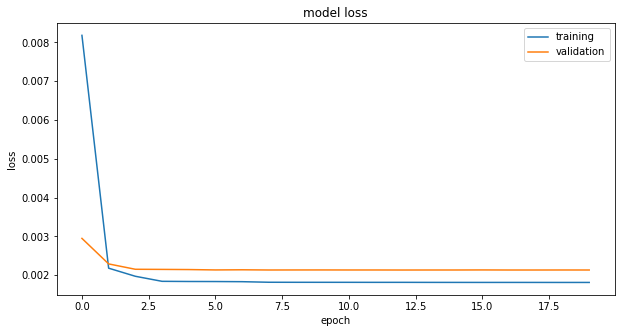

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: ADAM, learning rate: fixed 0.1


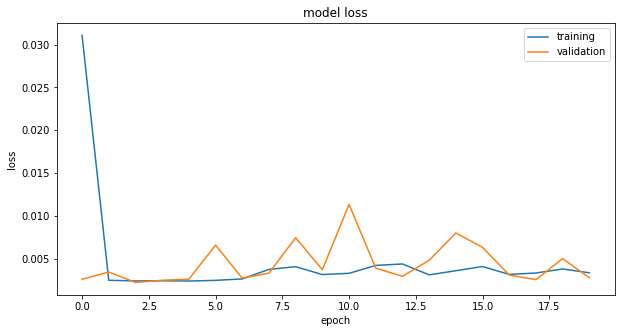

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: ADAM, learning rate: fixed 0.01


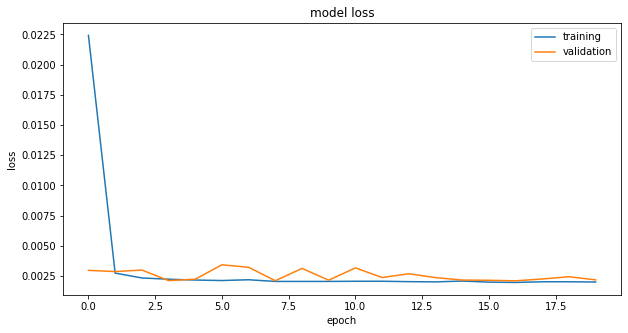

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: ADAM, learning rate: fixed 0.001


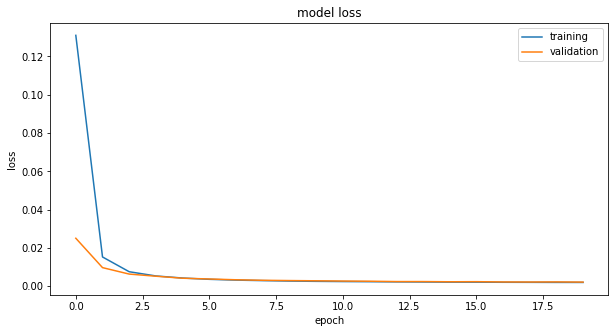

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: ADAM, learning rate: fixed 0.0005


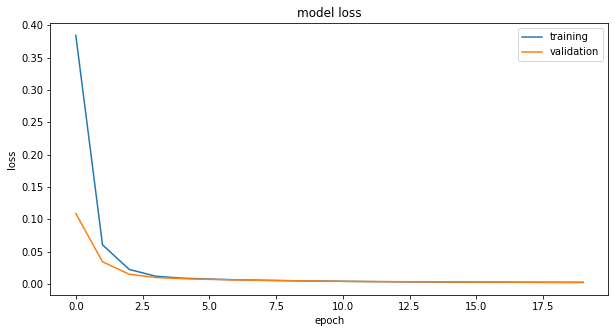

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: ADAM, learning rate: ExponentialDecay 0.01, 500, 0.9


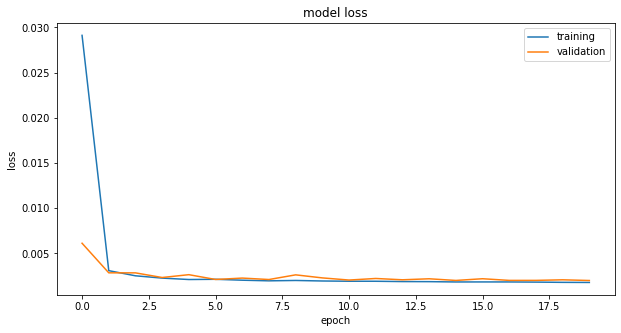

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: ADAM, learning rate: CosineDecay 0.01, 4000, 0.1


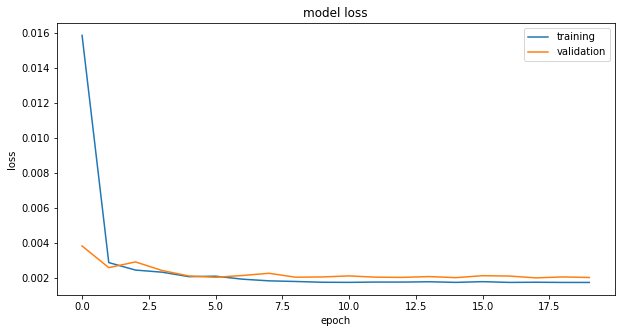

/home/david/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


optimizer: ADAM, learning rate: PiecewiseConstantDecay 0.1, 0.01, 0.001, 0.0005


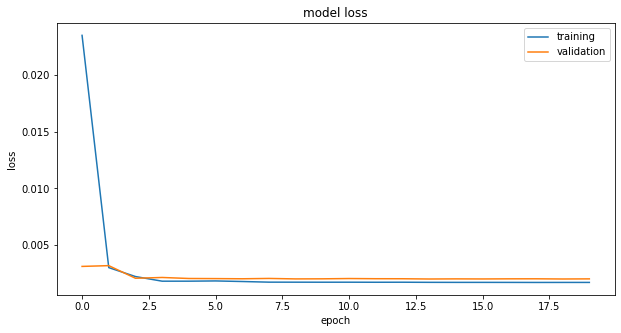

In [17]:
names_lr_schedules = [
    ("fixed 0.1", 0.1),
    ("fixed 0.01", 0.01),
    ("fixed 0.001", 0.001),
    ("fixed 0.0005", 0.0005),
    ("ExponentialDecay 0.01, 500, 0.9", tf.keras.optimizers.schedules.ExponentialDecay(0.01, 500, 0.9)),
    ("CosineDecay 0.01, 4000, 0.1", tf.keras.optimizers.schedules.CosineDecay(0.01, 4000, 0.1)),
    ("PiecewiseConstantDecay 0.1, 0.01, 0.001, 0.0005", tf.keras.optimizers.schedules.PiecewiseConstantDecay([1000, 2500, 5000], [0.1, 0.01, 0.001, 0.0005]))
]

optimizers_momentum = [
    ("SGD", 0.0),
    ("SGD momentum 0.9", 0.9),
    ("SGD momentum 0.75", 0.75),
    ("ADAM", None)
]

optimizer_results_loss_df = pd.DataFrame()
optimizer_results_validation_loss_df = pd.DataFrame()

for optimizer_name, momentum in optimizers_momentum:
  for lr_name, lr_schedule in names_lr_schedules:
    chosen_model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(20, input_dim=10, activation='relu'),
        tf.keras.layers.Dense(1),
    ])

    if "SGD" in optimizer_name:
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=momentum)
    elif "ADAM" in optimizer_name:
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

    chosen_model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError())
    history = chosen_model.fit(X_train, Y_train, epochs=EPOCHS, validation_split=0.2, batch_size=BATCH_SIZE, verbose=0)

    print(f"optimizer: {optimizer_name}, learning rate: {lr_name}")
    plot_model_training(history)

    optimizer_results_loss_df.loc[lr_name, optimizer_name] = history.history['loss'][-1]
    optimizer_results_validation_loss_df.loc[lr_name, optimizer_name] = history.history['val_loss'][-1]

In [18]:
optimizer_results_loss_df.style.background_gradient(cmap='Blues', axis=None)

,SGD,SGD momentum 0.9,SGD momentum 0.75,ADAM
fixed 0.1,0.002028,0.001863,0.001845,0.003370
fixed 0.01,0.002584,0.001916,0.001934,0.002009
fixed 0.001,0.013692,0.002558,0.004173,0.001973
fixed 0.0005,0.024550,0.003817,0.006180,0.002227
"ExponentialDecay 0.01, 500, 0.9",0.003390,0.001987,0.002402,0.001779
"CosineDecay 0.01, 4000, 0.1",0.004649,0.002145,0.002507,0.001764
"PiecewiseConstantDecay 0.1, 0.01, 0.001, 0.0005",0.002775,0.001758,0.001812,0.001711


In [19]:
optimizer_results_validation_loss_df.style.background_gradient(cmap='Blues', axis=None)

,SGD,SGD momentum 0.9,SGD momentum 0.75,ADAM
fixed 0.1,0.002233,0.002020,0.002103,0.002804
fixed 0.01,0.002773,0.002172,0.002201,0.002186
fixed 0.001,0.013671,0.002710,0.004527,0.002158
fixed 0.0005,0.024776,0.004139,0.006139,0.002462
"ExponentialDecay 0.01, 500, 0.9",0.003525,0.002298,0.002644,0.001993
"CosineDecay 0.01, 4000, 0.1",0.004896,0.002403,0.002659,0.002046
"PiecewiseConstantDecay 0.1, 0.01, 0.001, 0.0005",0.003037,0.002085,0.002133,0.002024


Epoch 1/20
475/475 [==============================] - 1s 1ms/step - loss: 0.0184
Epoch 2/20
475/475 [==============================] - 0s 986us/step - loss: 0.0028
Epoch 3/20
475/475 [==============================] - 0s 998us/step - loss: 0.0024
Epoch 4/20
475/475 [==============================] - 0s 994us/step - loss: 0.0022
Epoch 5/20
475/475 [==============================] - 0s 967us/step - loss: 0.0022
Epoch 6/20
475/475 [==============================] - 0s 940us/step - loss: 0.0021
Epoch 7/20
475/475 [==============================] - 0s 926us/step - loss: 0.0021
Epoch 8/20
475/475 [==============================] - 0s 918us/step - loss: 0.0020
Epoch 9/20
475/475 [==============================] - 0s 977us/step - loss: 0.0020
Epoch 10/20
475/475 [==============================] - 0s 989us/step - loss: 0.0020
Epoch 11/20
475/475 [==============================] - 0s 938us/step - loss: 0.0019
Epoch 12/20
475/475 [==============================] - 0s 942us/step - loss: 0.0019
Epo

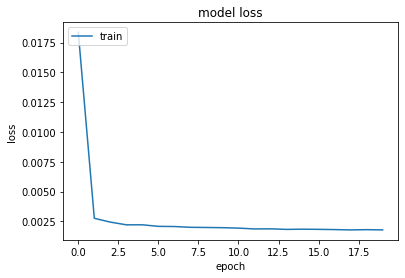

In [20]:
final_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_dim=10, activation='relu'),
    tf.keras.layers.Dense(1)
])

scheduler = tf.keras.optimizers.schedules.ExponentialDecay(0.01, 500, 0.9)

final_model.compile(optimizer=tf.keras.optimizers.Adam(scheduler), loss='mse')
final_history = final_model.fit(
    X_train, Y_train, 
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)


plt.plot(final_history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [21]:
Y_pred = final_model.predict(X_test).flatten()
print(f"Test MSE: {np.mean(np.square(Y_pred - Y_test))}")

119/119 [==============================] - 0s 643us/step
Test MSE: 0.0018245186638248167


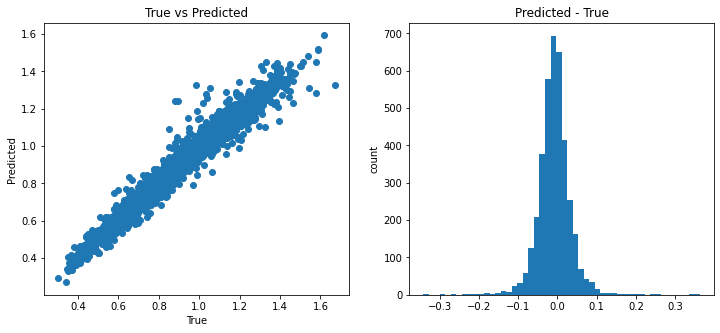

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.scatter(Y_test, Y_pred)
ax1.set_title('True vs Predicted')
ax1.set_xlabel('True')
ax1.set_ylabel('Predicted')
ax2.hist(Y_pred-Y_test, bins=50)
ax2.set_title('Predicted - True')
ax2.set_ylabel('count')
plt.show()